In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zoheb Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nlt

In [2]:
data = pd.read_csv('Resume.csv')

In [3]:
data

,Resumes,Category
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
...,...,...
74,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resume
75,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
76,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
77,\n\n Madeeswar A\n...,Workday Resume


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [5]:
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [6]:
data.duplicated().sum()

0

# Checking unnecessary words in the Data

In [7]:
data.Resumes.str.contains('https://').value_counts() / len(data)

False    0.911392
True     0.088608
Name: Resumes, dtype: float64

In [8]:
data.Resumes.str.contains('@').value_counts() / len(data)

False    0.962025
True     0.037975
Name: Resumes, dtype: float64

In [9]:
print('Total Resumes this period:', len(data.index), '\n')

Total Resumes this period: 79 



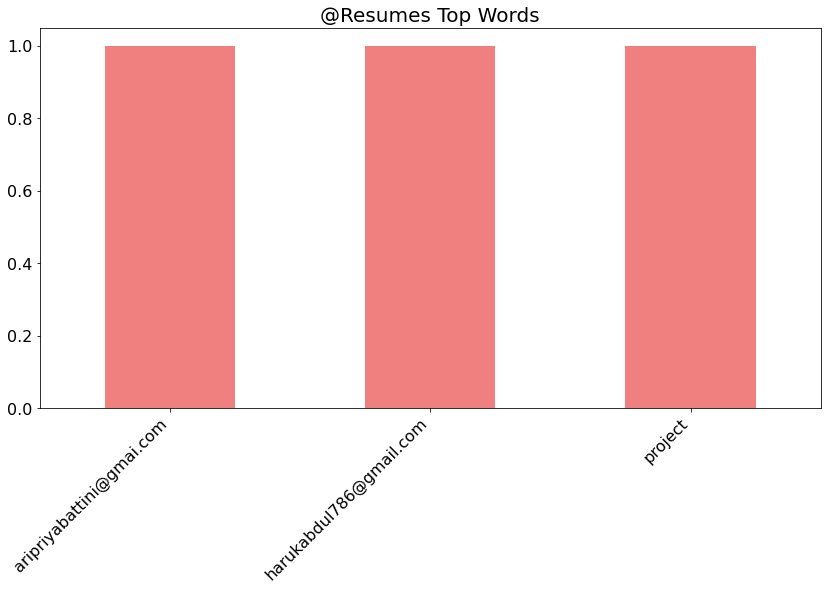

In [10]:
import itertools

c = list(
itertools.chain(
    *data.Resumes.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@Resumes Top Words', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

# Tokenization

In [11]:
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)


In [12]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI 

In [13]:
review_text=' '.join(data)
review_text[:1000]

'MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n     \n\n⇨ Currently working in PickupBiz Solution Private Limited, Pune from January 2021 to till date \n\n⇨ 9 Months of working as an Intern on UI React JS - Software Developer \n\n⇨ Having sound experience and exposure on UI development using React JS, Bootstrap, HTML 5, CSS, React Hooks, and Redux etc. \n\n⇨ Ability to work under any given environment \n\n⇨ Demonstrated good communication and Analytical skills \n\n⇨ Team building skills, emphasizing versatility and adaptability \n\n⇨ Dedication and drive as a hard-working individual \n\n⇨ Ability to manage multiple tasks in a pressured environment \n\n                                                                           \n\nApplication Development & UI Designing – \n\n Coordinated with the development team of 10 to discuss user interface ideas and applications. - Reviewed application requirements and interface designs to ensure compatibility with existing applications.  \n\n \n\nUI C

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['MD', 'KHIZARUDDIN', 'RAUF', 'EXPERIENCE', '⇨', 'Currently', 'working', 'in', 'PickupBiz', 'Solution', 'Private', 'Limited', ',', 'Pune', 'from', 'January', '2021', 'to', 'till', 'date', '⇨', '9', 'Months', 'of', 'working', 'as', 'an', 'Intern', 'on', 'UI', 'React', 'JS', '-', 'Software', 'Developer', '⇨', 'Having', 'sound', 'experience', 'and', 'exposure', 'on', 'UI', 'development', 'using', 'React', 'JS', ',', 'Bootstrap', ',', 'HTML', '5', ',', 'CSS', ',', 'React', 'Hooks', ',', 'and', 'Redux', 'etc', '.', '⇨', 'Ability', 'to', 'work', 'under', 'any', 'given', 'environment', '⇨', 'Demonstrated', 'good', 'communication', 'and', 'Analytical', 'skills', '⇨', 'Team', 'building', 'skills', ',', 'emphasizing', 'versatility', 'and', 'adaptability', '⇨', 'Dedication', 'and', 'drive', 'as', 'a', 'hard-working', 'individual', '⇨', 'Ability', 'to', 'manage', 'multiple', 'tasks']


In [15]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently working in PickupBiz Solution Private Limited , Pune from January 2021 to till date ⇨ 9 Months of working as an Intern on UI React JS - Software Developer ⇨ Having sound experience and exposure on UI development using React JS , Bootstrap , HTML 5 , CSS , React Hooks , and Redux etc . ⇨ Ability to work under any given environment ⇨ Demonstrated good communication and Analytical skills ⇨ Team building skills , emphasizing versatility and adaptability ⇨ Dedication and drive as a hard-working individual ⇨ Ability to manage multiple tasks in a pressured environment Application Development & UI Designing – Coordinated with the development team of 10 to discuss user interface ideas and applications . - Reviewed application requirements and interface designs to ensure compatibility with existing applications . UI Components Designing & Application Interface Coding – Identified web-based user interactions and developed highly responsive user interfac

# Remove Punchuation From Text

In [16]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently working in PickupBiz Solution Private Limited  Pune from January 2021 to till date ⇨ 9 Months of working as an Intern on UI React JS  Software Developer ⇨ Having sound experience and exposure on UI development using React JS  Bootstrap  HTML 5  CSS  React Hooks  and Redux etc  ⇨ Ability to work under any given environment ⇨ Demonstrated good communication and Analytical skills ⇨ Team building skills  emphasizing versatility and adaptability ⇨ Dedication and drive as a hardworking individual ⇨ Ability to manage multiple tasks in a pressured environment Application Development  UI Designing – Coordinated with the development team of 10 to discuss user interface ideas and applications   Reviewed application requirements and interface designs to ensure compatibility with existing applications  UI Components Designing  Application Interface Coding – Identified webbased user interactions and developed highly responsive user interface components via

# Remove URL'S from Text

In [17]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently working in PickupBiz Solution Private Limited  Pune from January 2021 to till date ⇨ 9 Months of working as an Intern on UI React JS  Software Developer ⇨ Having sound experience and exposure on UI development using React JS  Bootstrap  HTML 5  CSS  React Hooks  and Redux etc  ⇨ Ability to work under any given environment ⇨ Demonstrated good communication and Analytical skills ⇨ Team building skills  emphasizing versatility and adaptability ⇨ Dedication and drive as a hardworking individual ⇨ Ability to manage multiple tasks in a pressured environment Application Development  UI Designing – Coordinated with the development team of 10 to discuss user interface ideas and applications   Reviewed application requirements and interface designs to ensure compatibility with existing applications  UI Components Designing  Application Interface Coding – Identified webbased user interactions and developed highly responsive user interface components via

# Apply Tokenization on 100 Words

In [18]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['MD', 'KHIZARUDDIN', 'RAUF', 'EXPERIENCE', '⇨', 'Currently', 'working', 'in', 'PickupBiz', 'Solution', 'Private', 'Limited', 'Pune', 'from', 'January', '2021', 'to', 'till', 'date', '⇨', '9', 'Months', 'of', 'working', 'as', 'an', 'Intern', 'on', 'UI', 'React', 'JS', 'Software', 'Developer', '⇨', 'Having', 'sound', 'experience', 'and', 'exposure', 'on', 'UI', 'development', 'using', 'React', 'JS', 'Bootstrap', 'HTML', '5', 'CSS', 'React', 'Hooks', 'and', 'Redux', 'etc', '⇨', 'Ability', 'to', 'work', 'under', 'any', 'given', 'environment', '⇨', 'Demonstrated', 'good', 'communication', 'and', 'Analytical', 'skills', '⇨', 'Team', 'building', 'skills', 'emphasizing', 'versatility', 'and', 'adaptability', '⇨', 'Dedication', 'and', 'drive', 'as', 'a', 'hardworking', 'individual', '⇨', 'Ability', 'to', 'manage', 'multiple', 'tasks', 'in', 'a', 'pressured', 'environment', 'Application', 'Development', 'UI', 'Designing', '–']


In [19]:
len(text_tokens)

58363

# Removing Stopwords

In [20]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['MD', 'KHIZARUDDIN', 'RAUF', 'EXPERIENCE', '⇨', 'Currently', 'working', 'PickupBiz', 'Solution', 'Private', 'Limited', 'Pune', 'January', '2021', 'till', 'date', '⇨', '9', 'Months', 'working', 'Intern', 'UI', 'React', 'JS', 'Software', 'Developer', '⇨', 'Having', 'sound', 'experience', 'exposure', 'UI', 'development', 'using', 'React', 'JS', 'Bootstrap', 'HTML', '5', 'CSS', 'React', 'Hooks', 'Redux', 'etc', '⇨', 'Ability', 'work', 'given', 'environment', '⇨', 'Demonstrated', 'good', 'communication', 'Analytical', 'skills', '⇨', 'Team', 'building', 'skills', 'emphasizing', 'versatility', 'adaptability', '⇨', 'Dedication', 'drive', 'hardworking', 'individual', '⇨', 'Ability', 'manage', 'multiple', 'tasks', 'pressured', 'environment', 'Application', 'Development', 'UI', 'Designing', '–', 'Coordinated', 'development', 'team', '10', 'discuss', 'user', 'interface', 'ideas', 'applications', 'Reviewed', 'application', 'requirements', 'interface', 'designs', 'ensure', 'compatibility', 'existin

In [21]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['md', 'khizaruddin', 'rauf', 'experience', '⇨', 'currently', 'working', 'pickupbiz', 'solution', 'private', 'limited', 'pune', 'january', '2021', 'till', 'date', '⇨', '9', 'months', 'working', 'intern', 'ui', 'react', 'js', 'software', 'developer', '⇨', 'having', 'sound', 'experience', 'exposure', 'ui', 'development', 'using', 'react', 'js', 'bootstrap', 'html', '5', 'css', 'react', 'hooks', 'redux', 'etc', '⇨', 'ability', 'work', 'given', 'environment', '⇨', 'demonstrated', 'good', 'communication', 'analytical', 'skills', '⇨', 'team', 'building', 'skills', 'emphasizing', 'versatility', 'adaptability', '⇨', 'dedication', 'drive', 'hardworking', 'individual', '⇨', 'ability', 'manage', 'multiple', 'tasks', 'pressured', 'environment', 'application', 'development', 'ui', 'designing', '–', 'coordinated', 'development', 'team', '10', 'discuss', 'user', 'interface', 'ideas', 'applications', 'reviewed', 'application', 'requirements', 'interface', 'designs', 'ensure', 'compatibility', 'existin

# Applying Stemming

In [22]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['md', 'khizaruddin', 'rauf', 'experi', '⇨', 'current', 'work', 'pickupbiz', 'solut', 'privat', 'limit', 'pune', 'januari', '2021', 'till', 'date', '⇨', '9', 'month', 'work', 'intern', 'ui', 'react', 'js', 'softwar', 'develop', '⇨', 'have', 'sound', 'experi', 'exposur', 'ui', 'develop', 'use', 'react', 'js', 'bootstrap', 'html', '5', 'css', 'react', 'hook', 'redux', 'etc', '⇨', 'abil', 'work', 'given', 'environ', '⇨', 'demonstr', 'good', 'commun', 'analyt', 'skill', '⇨', 'team', 'build', 'skill', 'emphas', 'versatil', 'adapt', '⇨', 'dedic', 'drive', 'hardwork', 'individu', '⇨', 'abil', 'manag', 'multipl', 'task', 'pressur', 'environ', 'applic', 'develop', 'ui', 'design', '–', 'coordin', 'develop', 'team', '10', 'discuss', 'user', 'interfac', 'idea', 'applic', 'review', 'applic', 'requir', 'interfac', 'design', 'ensur', 'compat', 'exist', 'applic', 'ui', 'compon', 'design']


In [23]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

md khizaruddin rauf experience ⇨ currently working pickupbiz solution private limited pune january 2021 till date ⇨ 9 months working intern ui react js software developer ⇨ having sound experience exposure ui development using react js bootstrap html 5 css react hooks redux etc ⇨ ability work given environment ⇨ demonstrated good communication analytical skills ⇨ team building skills emphasizing versatility adaptability ⇨ dedication drive hardworking individual ⇨ ability manage multiple tasks pressured environment application development ui designing – coordinated development team 10 discuss user interface ideas applications reviewed application requirements interface designs ensure compatibility existing applications ui components designing


# Applying Lemmatization

In [24]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['md', 'khizaruddin', 'rauf', 'experience', '⇨', 'currently', 'work', 'pickupbiz', 'solution', 'private', 'limited', 'pune', 'january', '2021', 'till', 'date', '⇨', '9', 'month', 'work', 'intern', 'ui', 'react', 'js', 'software', 'developer', '⇨', 'have', 'sound', 'experience', 'exposure', 'ui', 'development', 'use', 'react', 'js', 'bootstrap', 'html', '5', 'css', 'react', 'hook', 'redux', 'etc', '⇨', 'ability', 'work', 'give', 'environment', '⇨', 'demonstrate', 'good', 'communication', 'analytical', 'skill', '⇨', 'team', 'building', 'skill', 'emphasize', 'versatility', 'adaptability', '⇨', 'dedication', 'drive', 'hardworke', 'individual', '⇨', 'ability', 'manage', 'multiple', 'task', 'pressure', 'environment', 'application', 'development', 'ui', 'designing', '–', 'coordinate', 'development', 'team', '10', 'discuss', 'user', 'interface', 'idea', 'application', 'review', 'application', 'requirement', 'interface', 'design', 'ensure', 'compatibility', 'exist', 'application', 'ui', 'compon

In [25]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'md khizaruddin rauf experience ⇨ currently work pickupbiz solution private limited pune january 2021 till date ⇨ 9 month work intern ui react js software developer ⇨ have sound experience exposure ui development use react js bootstrap html 5 css react hook redux etc ⇨ ability work give environment ⇨ demonstrate good communication analytical skill ⇨ team building skill emphasize versatility adaptability ⇨ dedication drive hardworke individual ⇨ ability manage multiple task pressure environment application development ui designing – coordinate development team 10 discuss user interface idea application review application requirement interface design ensure compatibility exist application ui component designing application interface code – identify webbase user interaction develop highly responsive user interface component via react concept translate design wireframe highquality code write application interface via javascript follow reactjs workflow code debug frontend architecture – tro

# Applying Text Processing On DataFrame

In [26]:
data = pd.read_csv("Resume.csv")

In [27]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

# Converting Into Clean Resumes

In [28]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA \n\nExperience as UI Develop...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer \n\nNAME: KRI...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A \n\nLinked In: https://www....
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P \n\n\n\n ...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,\nMaryala Vinay Reddy\n\nProfessional Summary:...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer \n\nNAME: KRI...


# Remove Url from Clean_Resumes

In [29]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: • Ha...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...


# Remove '!' from Clean_Resumes

In [30]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: • Ha...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...


# Removing Duplicate Resumes

In [31]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: • Ha...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...


In [32]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,HARIPRIYA BATTINA Experience as UI Developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,KAMALAKAR REDDY. A Linked In: PROFESSIONAL SUM...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: • Ha...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...


# Cleaning Words From Text

In [33]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [34]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...


# Removing Emoji from Clean_Resumes

In [35]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [36]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...


# Applying Tokenization On Clean_Resumes

In [37]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Resumes,Category,Clean_Resumes,Tokenized_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,"[md, khizaruddin, rauf, experience, currently,..."
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,"[haripriya, battina, experience, as, ui, devel..."
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,"[mareedu, lokesh, babu, professional, overview..."
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris..."
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...,"[kamalakar, reddy, a, linked, in, professional..."
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,"[maryala, vinay, reddy, professional, summary,..."
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris..."


In [38]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

# Removing stop words from Clean_Resumes and Making it Absolutely_Clean_Resumes

In [39]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,maryala vinay reddy professional summary havin...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...


In [40]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [md, khizaruddin, rauf, experience, currently,...
1    [susovan, bag, seeking, a, challenging, positi...
2    [haripriya, battina, experience, as, ui, devel...
3    [mareedu, lokesh, babu, professional, overview...
4    [uideveloper, react, js, developer, name, kris...
5    [naveen, sadhu, title, software, developer, lo...
6    [kamalakar, reddy, a, linked, in, professional...
7    [name, ravali, p, curriculum, vitae, specializ...
8    [maryala, vinay, reddy, professional, summary,...
9    [uideveloper, react, js, developer, name, kris...
Name: Absolute_Clean_Resumes, dtype: object

# Applying Lemmatization on Abosulte_Clean_Resumes

In [41]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to C:\Users\Zoheb
[nltk_data]     Kazi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [md, khizaruddin, rauf, experience, currently,...
1    [susovan, bag, seeking, a, challenging, positi...
2    [haripriya, battina, experience, a, ui, develo...
3    [mareedu, lokesh, babu, professional, overview...
4    [uideveloper, react, j, developer, name, krish...
5    [naveen, sadhu, title, software, developer, lo...
6    [kamalakar, reddy, a, linked, in, professional...
7    [name, ravali, p, curriculum, vitae, specializ...
8    [maryala, vinay, reddy, professional, summary,...
9    [uideveloper, react, j, developer, name, krish...
Name: Absolute_Clean_Resumes, dtype: object

In [42]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...,haripriya battina experience as ui developer i...
3,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
4,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
6,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...,kamalakar reddy a linked in professional summa...
7,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...
8,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,maryala vinay reddy professional summary havin...
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...


# Applying Count Vectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)

In [44]:
print(cv.get_feature_names()[100:2000])

['1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009', '20092011', '20092013', '2010', '2011', '20112013', '20112015', '2012', '20122014', '20122016', '2012r2', '2013', '20132017', '2014', '20142012', '20142016', '20142017', '2015', '20152017', '2016', '20162012', '2016r2', '2017', '20172019', '201784006', '2018', '2019', '2019to', '2020', '2021', '2022', '204', '21', '210', '211', '22', '2203', '2208', '224', '22nd', '23', '2301', '24', '247', '25', '25th', '26', '2601', '2627', '26387', '2705', '2728', '27th', '28', '281121', '2930', '2k15', '2k16', '2k18', '30', '300', '3015', '3031', '30th', '31', '310', '312', '32', '3233', '33', '34', '35', '36', '360', '364445', '365', '37', '38', '39', '3year', '401', '401k', '41', '411', '42', '43', '44', '46', '49600', '498', '50', '500090', '508', '51', '518', '52', '5267', '528', '53', '5312', '538', '53854', '54'

In [45]:
print(cv.get_feature_names()[:4000])

['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009'

In [46]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(review_cv.toarray().shape)

(45752, 4370)


# Applyong Count vectorizer on NGrams

In [48]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [49]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['006', '01', '012019', '0144b', '016', '017', '022019', '032', '032012', '032014', '032018', '032019', '032020', '032021', '04', '0411', '042019', '042021', '04th', '05', '0509', '052015', '052018', '052021', '05th', '06', '062019', '06th', '07', '072017', '07th', '08', '082011', '082012', '082014', '082018', '082020', '09', '092015', '092020', '10', '100', '1011', '1013', '102', '103', '104236', '106', '109', '10gr2', '10gr3', '10gr3and', '10th', '11', '1109', '112', '112013', '1131', '11gr2', '11i', '11th', '12', '121', '122', '122020', '12c', '12cr1', '12cr2', '12th', '13', '13000', '14', '15', '1502', '1508', '157', '16', '16698139', '17', '1713', '17329', '18', '188', '18c', '19', '19000', '1904', '197174', '1982', '1985', '1987', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '20002003', '2001', '20011', '2002', '2003', '20032008', '2004', '2005', '2006', '2007', '20072008', '2008', '20082012', '2008r2', '2009'

In [50]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)

In [51]:
data

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,md khizaruddin rauf experience currently worki...
1,React JS Developer Resume,susovan bag seeking a challenging position in ...
2,React JS Developer Resume,haripriya battina experience as ui developer i...
3,React JS Developer Resume,mareedu lokesh babu professional overview arou...
4,React JS Developer Resume,uideveloper react js developer name krishna pr...
...,...,...
74,Workday Resume,himamendu career objective to continue growing...
75,Workday Resume,srikanth workday hcm consultant seeking suitab...
76,Workday Resume,name gopi krishna reddy professional summery w...
77,Workday Resume,madeeswar a profile summary having around year...


In [52]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 597), ('peoplesoft', 443), ('workday', 427), ('application', 417), ('using', 395), ('server', 350), ('data', 332), ('reports', 322), ('project', 305), ('business', 269), ('web', 241), ('database', 238), ('sql', 237), ('process', 233), ('worked', 219), ('knowledge', 210), ('client', 192), ('system', 190), ('involved', 189), ('tools', 189), ('integrations', 187), ('integration', 181), ('like', 180), ('support', 175), ('hcm', 173), ('skills', 170), ('good', 169), ('development', 163), ('team', 163), ('creating', 163), ('working', 161), ('people', 160), ('technical', 157), ('design', 152), ('services', 151), ('servers', 151), ('testing', 150), ('report', 150), ('various', 146), ('created', 146), ('role', 139), ('environment', 138), ('developer', 136), ('responsibilities', 134), ('security', 133), ('oracle', 133), ('management', 132), ('production', 130), ('issues', 129), ('studio', 127), ('eib', 127), ('’', 125), ('work', 123), ('core', 121), ('custom', 118), ('react', 117)

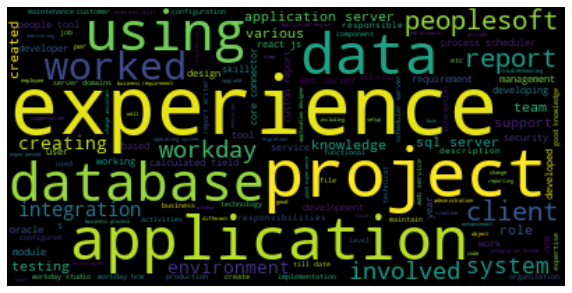

In [53]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [55]:
data_categories = [data[data['Category'] == category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes           Category
 24  hari narayana professional summary having year...  PeopleSoft resume
 25  personal details name pritam biswas date of bi...  PeopleSoft resume
 26  peoplesoft administration vivekanand sayana ca...  PeopleSoft resume
 27  classification internal classification interna...  PeopleSoft resume
 28  rahul ahuja summary years of experience in peo...  PeopleSoft resume
 29  c o n t a c t address manyata tech park nagava...  PeopleSoft resume
 30  murali professional summary having years of ex...  PeopleSoft resume
 31  priyabrata hota career objective pursuing peop...  PeopleSoft resume
 32  tanna sujatha objective seeking a challenging ...  PeopleSoft resume
 33  peoplesoft database administrator gangareddy p...  PeopleSoft resume
 34  arun venu experience summary experience of yea...  PeopleSoft resume
 35  peoplesoft adminpeoplesoft dba ganesh alladi c...  PeopleSoft resume
 36  anubhav kumar singh core competen

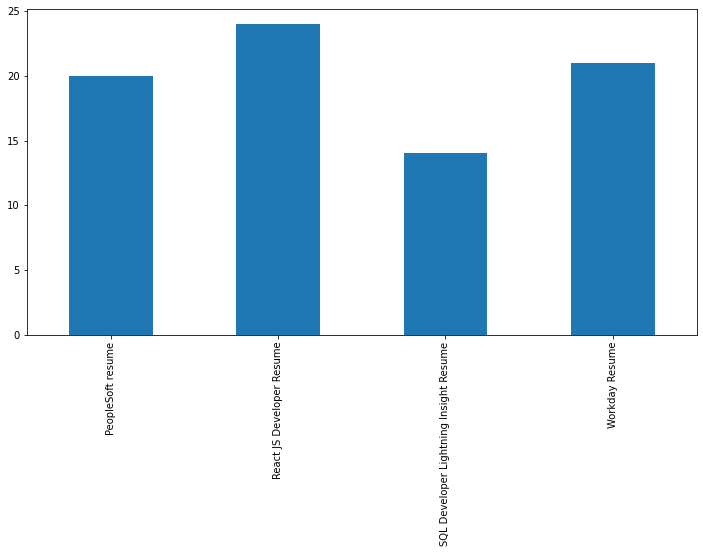

In [56]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [57]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

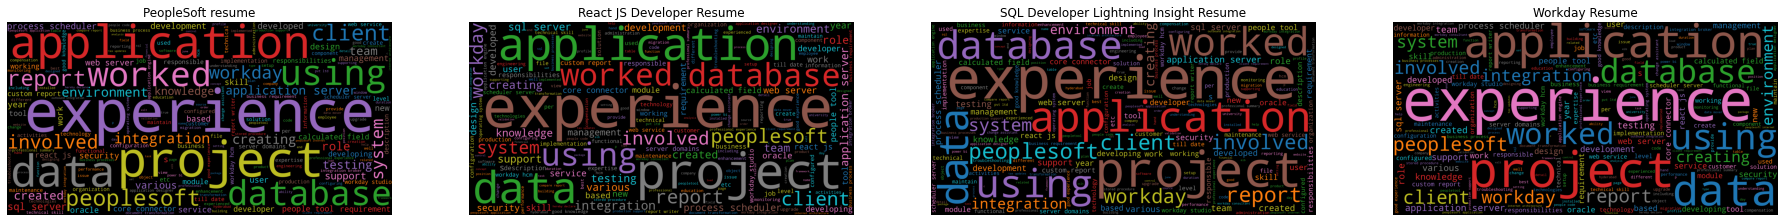

In [58]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [59]:
def wordfreq(df):
    count = data['Absolute_Clean_Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

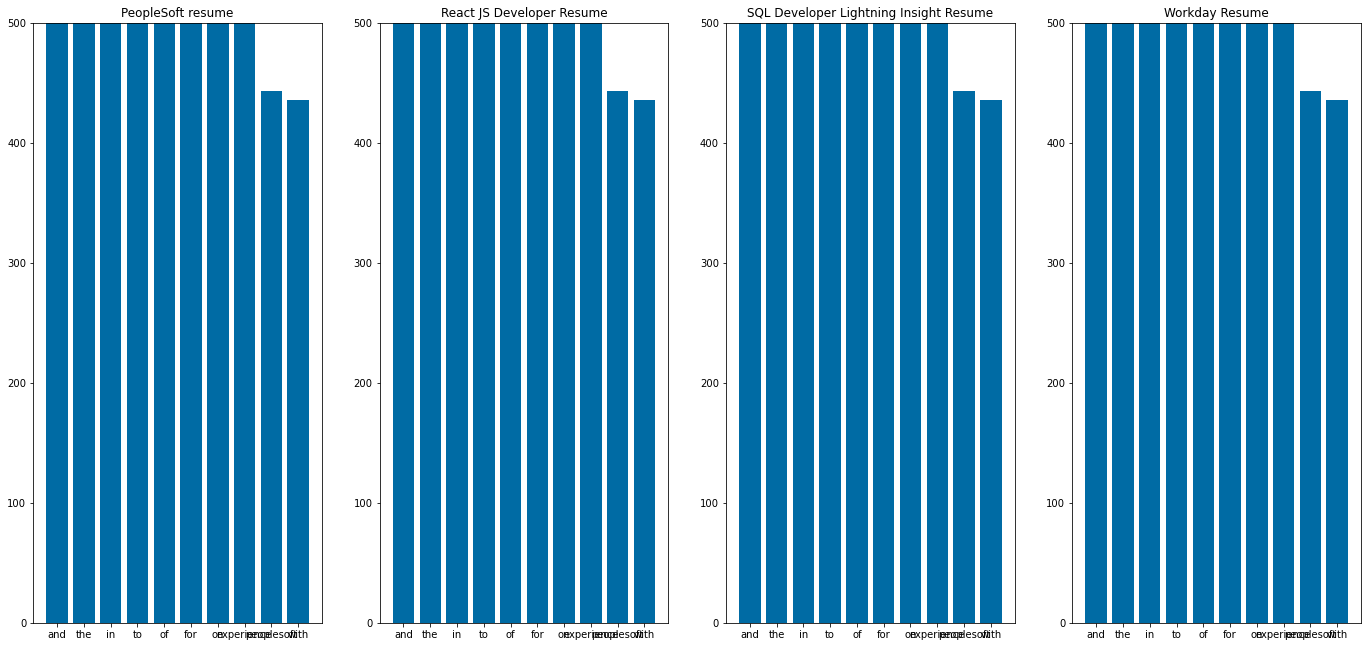

In [60]:
fig = plt.figure(figsize=(30, 64))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [61]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [62]:
data

,Category,Absolute_Clean_Resumes
0,1,md khizaruddin rauf experience currently worki...
1,1,susovan bag seeking a challenging position in ...
2,1,haripriya battina experience as ui developer i...
3,1,mareedu lokesh babu professional overview arou...
4,1,uideveloper react js developer name krishna pr...
...,...,...
74,3,himamendu career objective to continue growing...
75,3,srikanth workday hcm consultant seeking suitab...
76,3,name gopi krishna reddy professional summery w...
77,3,madeeswar a profile summary having around year...


In [63]:
data.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

<Figure size 10000x5000 with 0 Axes>

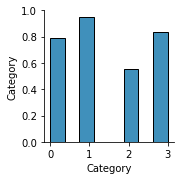

In [64]:
plt.figure(figsize=(20,10),dpi=500)
sns.pairplot(data = data)

<AxesSubplot:xlabel='count', ylabel='Category'>

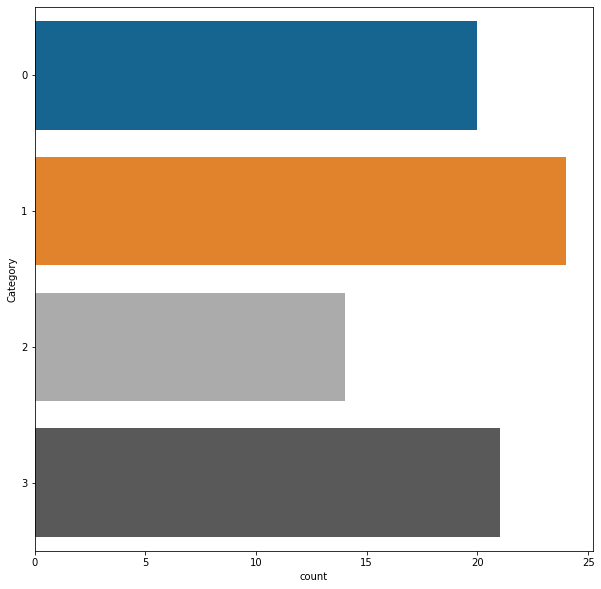

In [65]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=data)

In [66]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

In [67]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [68]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

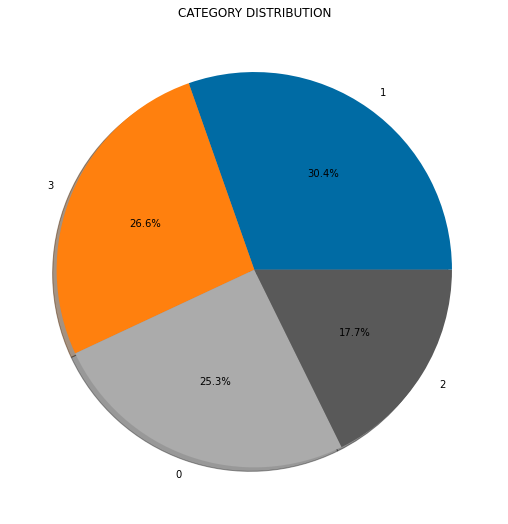

In [69]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [71]:
requiredText = data['Absolute_Clean_Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)



In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4736), (16, 4736))

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Logistic Regression

In [74]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [75]:
predict1 = lg.predict(X_test)

In [76]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.9375

In [77]:
cm = confusion_matrix(y_test,predict1)
cm

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

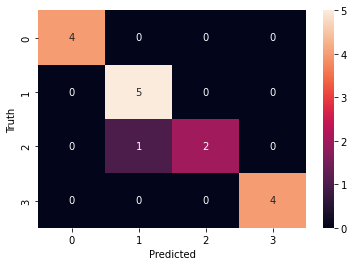

In [78]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [79]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



In [80]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [81]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


# Support Vector Machine Classifier(SVC)

In [82]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)

In [83]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.9375

In [84]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

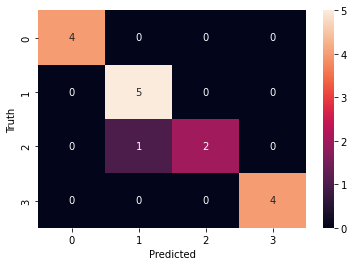

In [85]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [86]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



In [87]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

In [88]:
print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


# Random Forest Classifier

In [89]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [90]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

In [91]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

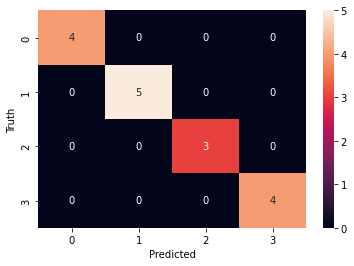

In [92]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [93]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [94]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# Naive-Bayes Classifier

In [95]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [96]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.875

In [97]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

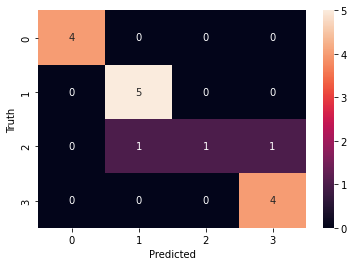

In [98]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [99]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.33      0.50         3
           3       0.80      1.00      0.89         4

    accuracy                           0.88        16
   macro avg       0.91      0.83      0.82        16
weighted avg       0.90      0.88      0.85        16



In [100]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.875
Precision Score :  0.9083
Recall Score    :  0.8333
f1-Score        :  0.8245


# Decision Tree Classifier

In [101]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [102]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

1.0

In [103]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

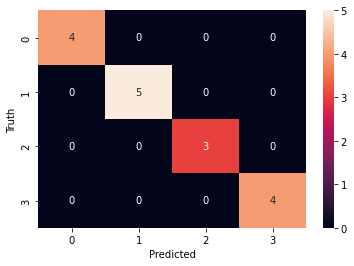

In [104]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [105]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [106]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# AdaBoost Classifier

In [107]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [108]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.9375

In [109]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [1, 0, 0, 3]], dtype=int64)

Text(33.0, 0.5, 'Truth')

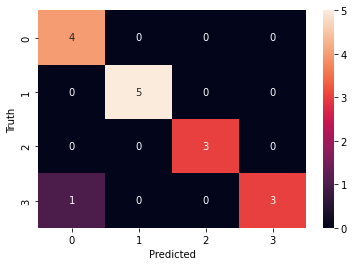

In [110]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [111]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [112]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9375
f1-Score        :  0.9365


# GradientBoosting Classifier

In [113]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [114]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

In [115]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

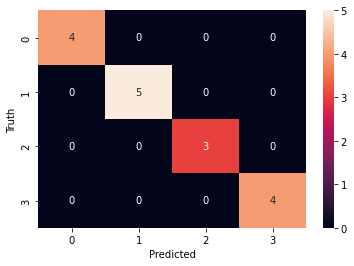

In [116]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [117]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [118]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


# XGBoost Classifier

In [119]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [120]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8

0.9375

In [121]:
cm8 = confusion_matrix(y_test,predict8)
cm8

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [1, 0, 0, 3]], dtype=int64)

Text(33.0, 0.5, 'Truth')

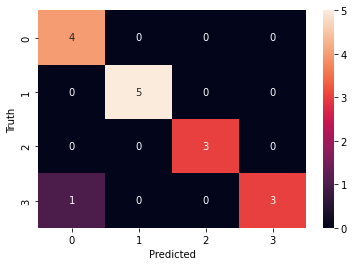

In [122]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [123]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [124]:
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9375
f1-Score        :  0.9365


# LGBM-Boosting Classifier

In [125]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)

In [126]:
accuracy_9 = accuracy_score(y_test,predict9)
accuracy_9

0.9375

In [127]:
cm9 = confusion_matrix(y_test,predict9)
cm9

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [1, 0, 0, 3]], dtype=int64)

Text(33.0, 0.5, 'Truth')

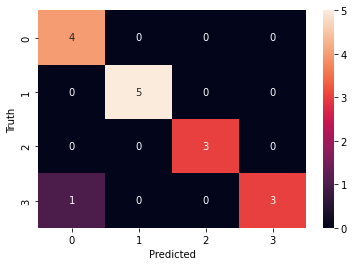

In [128]:
sns.heatmap(cm9,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [129]:
print(classification_report(y_test,predict9))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.95      0.94      0.94        16
weighted avg       0.95      0.94      0.94        16



In [130]:
accuracy_9 = round(accuracy_score(y_test,predict9),4)
precision_9 = round(precision_score(y_test,predict9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,predict9, average = 'macro'),4)
f1_9 = round(f1_score(y_test,predict9, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9375
f1-Score        :  0.9365


In [131]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,Naive-Bayes Classifier,0.8750,0.9083,0.8333,0.8245
1,Logistic Regression,0.9375,0.9583,0.9167,0.9273
2,SVM Classifier,0.9375,0.9583,0.9167,0.9273
3,AdaBoost Classifier,0.9375,0.9500,0.9375,0.9365
4,Xtreme Gradient Boosting Classifier,0.9375,0.9500,0.9375,0.9365
5,Light Gradient Boosting Classifier,0.9375,0.9500,0.9375,0.9365
6,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
7,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
8,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000


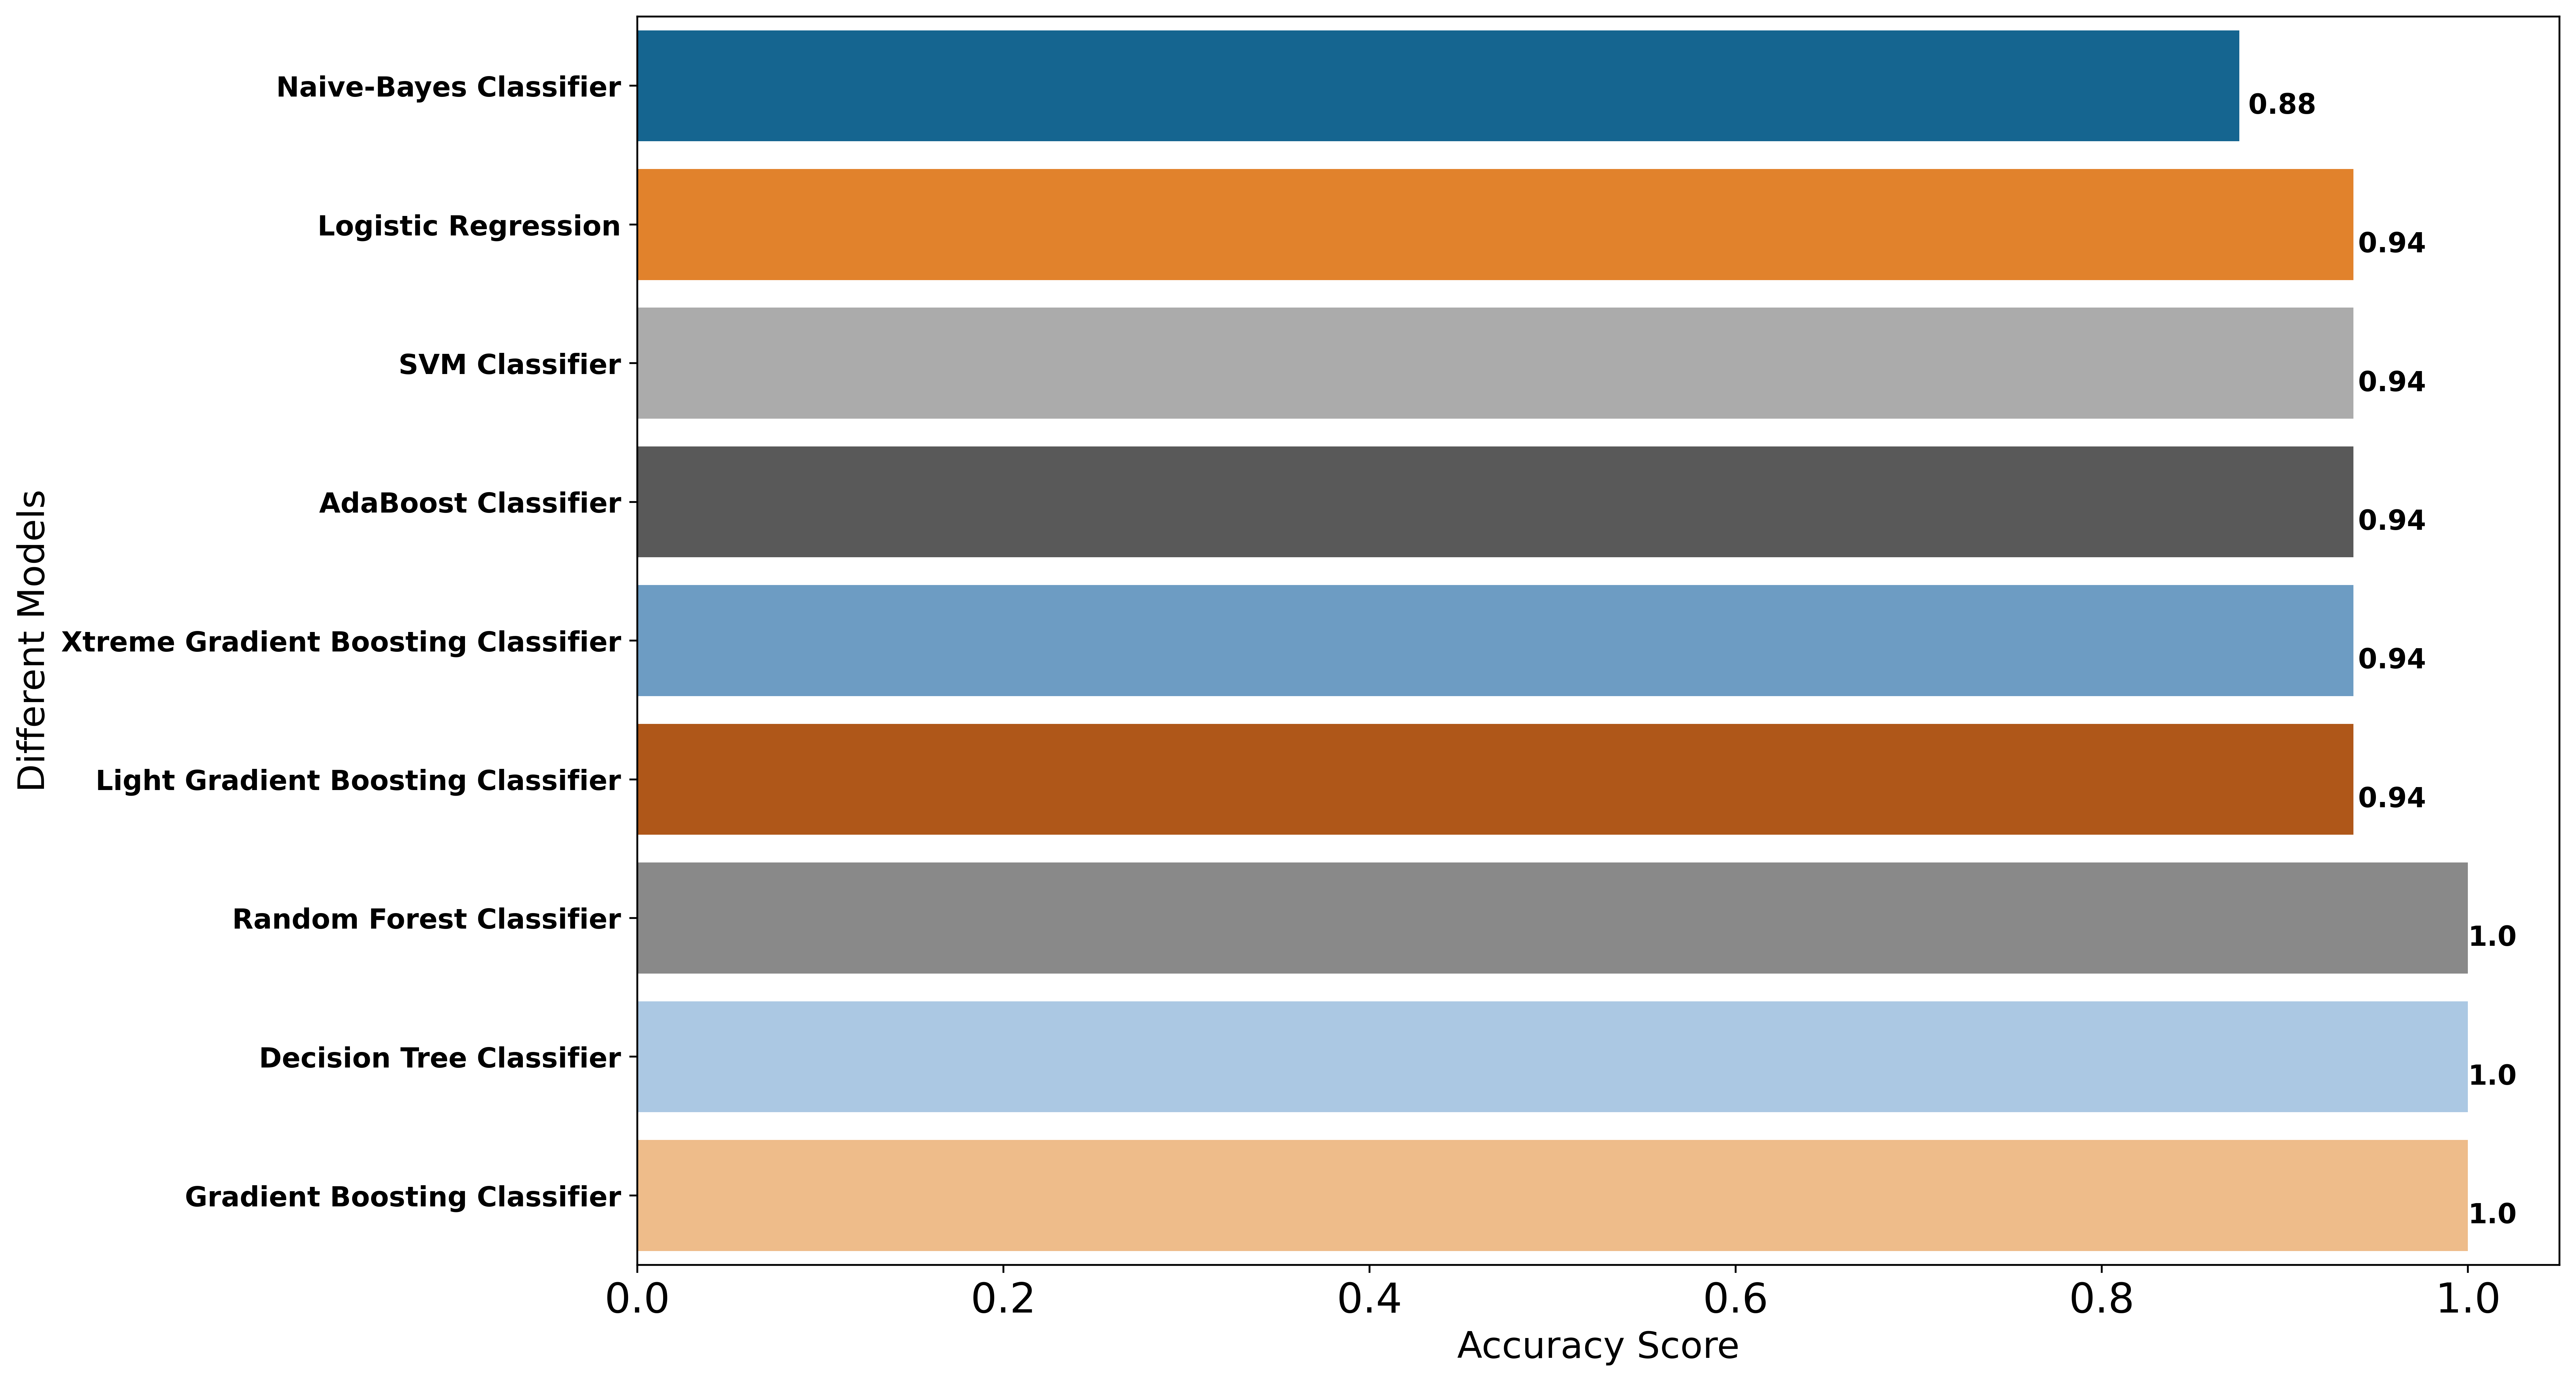

In [132]:
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sns.barplot(x='Accuracy', y='Classifier', data=table, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table.Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()